**Name: Seán Kendall**

**Student Number: 20355246**

# Machine Learning Assignment 2

#### Question 1 

In [1]:
# import packages
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

(a) Clean and prepare the dataset for machine learning analysis. You can do basic feature engineering to make your techniques scalable, but there is no need to go overboard with the dataset cleaning. Carefully consider the evaluation measure(s) that you use for this exercise and justify why you selected the particular evaluation measure(s).

In [2]:
df = pd.read_csv("census_20355246.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,29,Local-gov,180916,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,38,United-States,<=50K
1,38,Private,159179,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K
2,46,Private,128460,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
3,17,Private,222618,11th,7,Never-married,Sales,Own-child,Black,Female,0,0,30,United-States,<=50K
4,34,Private,117444,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,65,United-States,>50K


In [3]:
df.shape

(10000, 15)

There are 10000 rows in this dataset. The columns include 14 features and one target column, "Income-category". 

In [4]:
df.dtypes

age                  int64
 workclass          object
 fnlwgt              int64
 education          object
 education-num       int64
 marital-status     object
 occupation         object
 relationship       object
 race               object
 sex                object
 capital-gain        int64
 capital-loss        int64
 hours-per-week      int64
 native-country     object
 Income-category    object
dtype: object

There are 6 numerical columns "int" and the rest are of type "object". All are appropriate.

In [5]:
column_names = df.columns
print(column_names)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Income-category'],
      dtype='object')


Column names need to stripped of leading space.

In [6]:
df.nunique()

age                   71
 workclass             9
 fnlwgt             8541
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        100
 capital-loss         71
 hours-per-week       81
 native-country       41
 Income-category       2
dtype: int64

In [7]:
df[" Income-category"].unique()

array([' <=50K', ' >50K'], dtype=object)

The two target values in the dataset are " <=50k" and " >50k". Could be converted to 0 and 1 using LabelEncoder.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,38.5154,13.688488,17.0,28.0,37.0,47.0,90.0
fnlwgt,10000.0,190348.9101,106557.798654,12285.0,117615.0,179482.5,237622.5,1268339.0
education-num,10000.0,10.0743,2.569093,1.0,9.0,10.0,12.0,16.0
capital-gain,10000.0,1006.9754,7083.766639,0.0,0.0,0.0,0.0,99999.0
capital-loss,10000.0,82.6338,393.864315,0.0,0.0,0.0,0.0,4356.0
hours-per-week,10000.0,40.3614,12.110568,1.0,40.0,40.0,45.0,99.0


Above gives a nice overview of the numerical values in the dataset. The mean and std for these values is very broad in terms of range.

Are there duplicate records?

In [9]:
duplicate_records = df[df.duplicated()]
duplicate_records

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category


No duplicate records.

Inspecting categorical features:

In [10]:
categorical_features = selector(dtype_include=["object"])
categorical_features = categorical_features(df)
data_categorical = df[categorical_features]
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income-category
0,Local-gov,Some-college,Separated,Adm-clerical,Unmarried,White,Female,United-States,<=50K
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
2,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,<=50K
3,Private,11th,Never-married,Sales,Own-child,Black,Female,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [11]:
target = data_categorical.pop(" Income-category")
target.head()

0     <=50K
1      >50K
2     <=50K
3     <=50K
4      >50K
Name:  Income-category, dtype: object

In [12]:
target.value_counts()

 <=50K    7600
 >50K     2400
Name:  Income-category, dtype: int64

Above you can see there is not an equal balance of values in the target column. " <=50K" is the dominant class in this dataset and is almost around three times larger than " >50K". This should be taken into consideration when choosing an evaluation measure.  

"?" values

In [13]:
value_counts = df[' occupation'].value_counts()
print(value_counts)

 Prof-specialty       1276
 Exec-managerial      1258
 Craft-repair         1244
 Adm-clerical         1170
 Sales                1106
 Other-service        1034
 Machine-op-inspct     594
 ?                     561
 Transport-moving      518
 Handlers-cleaners     402
 Tech-support          295
 Farming-fishing       295
 Protective-serv       199
 Priv-house-serv        45
 Armed-Forces            3
Name:  occupation, dtype: int64


In [14]:
value_counts = df[' native-country'].value_counts()
print(value_counts)


 United-States            9019
 Mexico                    189
 ?                         161
 Philippines                50
 Germany                    46
 India                      40
 Canada                     39
 Puerto-Rico                30
 England                    26
 El-Salvador                26
 Cuba                       25
 Guatemala                  23
 Jamaica                    21
 Italy                      21
 China                      20
 Japan                      20
 Poland                     20
 Taiwan                     19
 Iran                       18
 South                      18
 Columbia                   17
 Vietnam                    16
 Dominican-Republic         15
 Ecuador                    12
 Haiti                      11
 Greece                     10
 France                     10
 Portugal                    9
 Peru                        9
 Ireland                     8
 Nicaragua                   8
 Cambodia                    7
 Hong   

In [15]:
value_counts = df[' workclass'].value_counts()
print(value_counts)


 Private             6974
 Self-emp-not-inc     788
 Local-gov            610
 ?                    557
 State-gov            411
 Self-emp-inc         348
 Federal-gov          303
 Without-pay            5
 Never-worked           4
Name:  workclass, dtype: int64


These three features have "?" values. I will remove the rows that contain this value.

Outliers and Distribution?

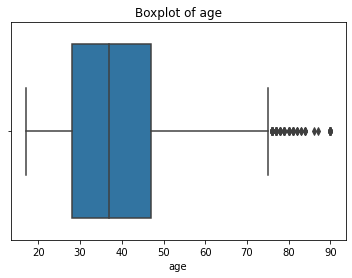

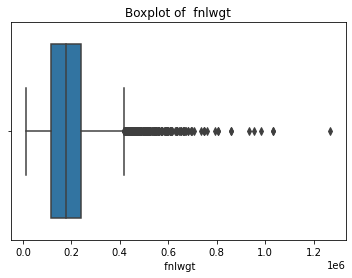

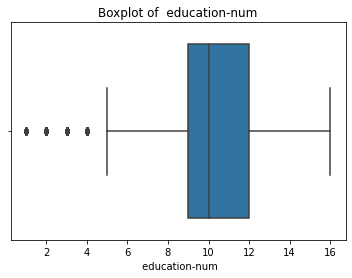

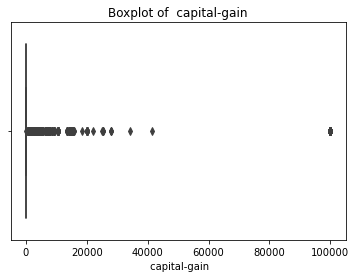

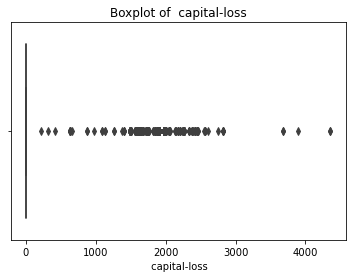

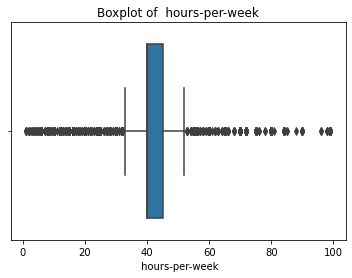

In [16]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create boxplots for all numerical columns
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Going to remove replace from age, fnlwgt, education-num. hours-per-week. Keeping capital-gain and capital-loss outliers because I feel they could be important to predict the income class.

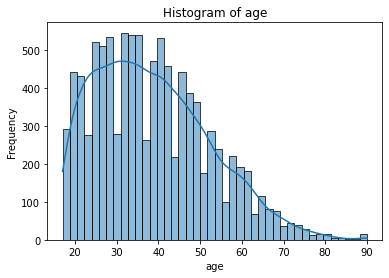

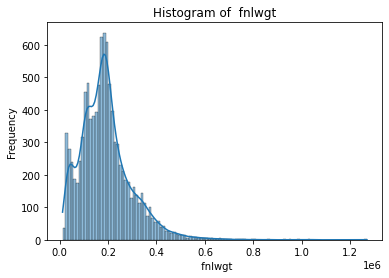

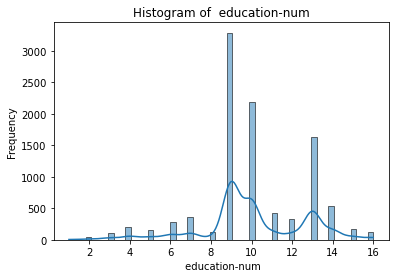

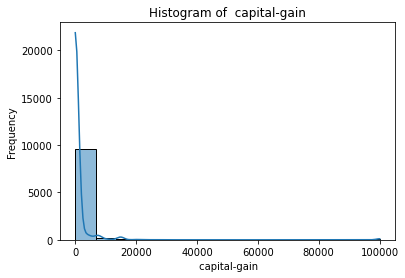

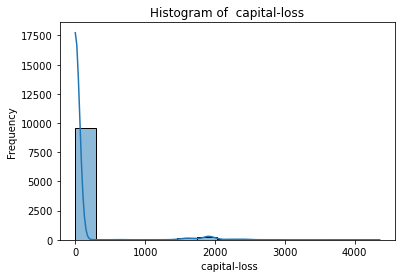

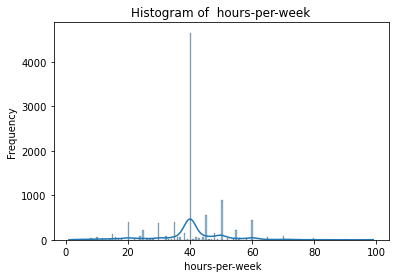

In [17]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create histograms for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    sns.histplot(data=df, x=column, kde=True)  # Use sns.histplot for histograms with KDE
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Looking at the distribution of the data, none of the numerical features are Gaussian. This could be a reason to normalize the dataframe.

#### Potential problems and data quality issues are:

(1) Feature names have a space before the first word and there are spaces in column values that are unecessary.

(2) "?" values to be dealt with.

(3) Outliers need to be handled.

(4) Target column is an object datatype. 

(5) Categorical features need to be converted to numerical. 

(6) Numerical features need to be handled.

#### Solutions:

(1) Strip leading space from column names and remove blank space from values.

(2) Removing the "?" values.

(3) Remove the outliers using IQR.

(4) Convert target column to 0 and 1 classes. This can be done with LabelEncoder.

(5) Convert categorical features to numerical:
- OneHotEncoder to convert the categorical features to numerical.
- Drop "education" feature, "education-num" is similar and already in numerical form. 

(6) Normalize the dataframe.

#### (1) Removing unnecessary space from feature names and values: 

Feature names:

In [18]:
df.columns = df.columns.str.strip()
data_categorical.columns = data_categorical.columns.str.strip()
column_names = df.columns
print(column_names)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income-category'],
      dtype='object')


Feature names no longer have a leading space.

Below is an example of where there is a blank space before the "workclass" values. This doesn't need to be there and hence I shall remove it.

In [19]:
df["workclass"].unique()

array([' Local-gov', ' Private', ' Self-emp-not-inc', ' Self-emp-inc',
       ' State-gov', ' ?', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

First I need to convert all "object" type features to "string" so that I can remove the spaces.

In [20]:
object_columns = df.select_dtypes(include=["object"]).columns
df[object_columns] = df[object_columns].astype("string")

object_columns = data_categorical.select_dtypes(include=["object"]).columns
data_categorical[object_columns] = data_categorical[object_columns].astype("string")

C:\Users\Sean\AppData\Local\Temp\ipykernel_22360\714066217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical[object_columns] = data_categorical[object_columns].astype("string")


In [21]:
df.dtypes

age                 int64
workclass          string
fnlwgt              int64
education          string
education-num       int64
marital-status     string
occupation         string
relationship       string
race               string
sex                string
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     string
Income-category    string
dtype: object

Now all "object" types are replaced with "string".

In [22]:
df = df.applymap(lambda x: x if not isinstance(x, str) else x.replace(' ', ''))
data_categorical = data_categorical.applymap(lambda x: x if not isinstance(x, str) else x.replace(' ', ''))
target = target.map(lambda x: x if not isinstance(x, str) else x.replace(' ', ''))

Above I remove all the spaces.

In [23]:
df["workclass"].unique()

array(['Local-gov', 'Private', 'Self-emp-not-inc', 'Self-emp-inc',
       'State-gov', '?', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

Now we can see our previous example is fixed.

#### (2) Remove "?" values

In [24]:
df.replace('?', np.nan, inplace=True)

nan_values = df.isna().sum()
nan_values

age                  0
workclass          557
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation         561
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     161
Income-category      0
dtype: int64

In [25]:
df.dropna(inplace=True)

nan_values = df.isna().sum()
nan_values

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
Income-category    0
dtype: int64

Now we can see there are no missing values in the dataframe.

In [26]:
df.shape

(9288, 15)

In [27]:
categorical_features = selector(dtype_include=["object"])
categorical_features = categorical_features(df)
data_categorical = df[categorical_features]
data_categorical.shape

(9288, 9)

In [28]:
target = data_categorical.pop("Income-category")
target.shape

(9288,)

All my dataframes now have the same number of rows.

#### (3) Remove outliers

Defining a function to replace outliers with upper and lower band values.

In [29]:
def replace_outliers(column):
    q1 = df[column.name].quantile(0.25)
    q3 = df[column.name].quantile(0.75)
    iqr = q3 - q1

    lower = q1-1.5*iqr
    upper = q3+1.5*iqr

    df.loc[df[column.name] < lower, column.name] = lower
    df.loc[df[column.name] > upper, column.name] = upper

In [30]:
replace_outliers(df["age"])
replace_outliers(df["fnlwgt"])
replace_outliers(df["education-num"])
replace_outliers(df["hours-per-week"])

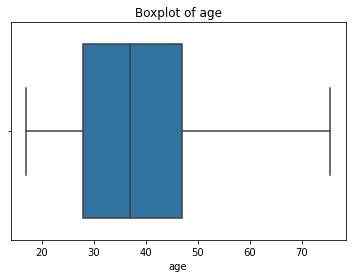

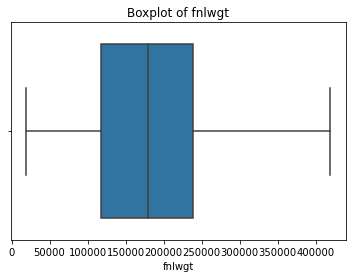

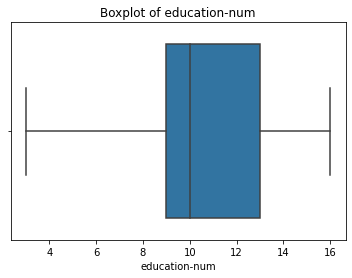

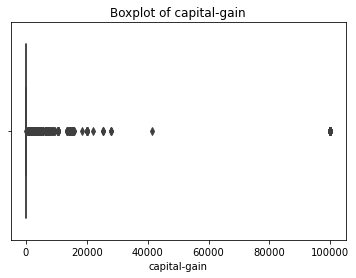

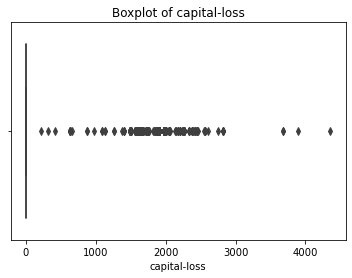

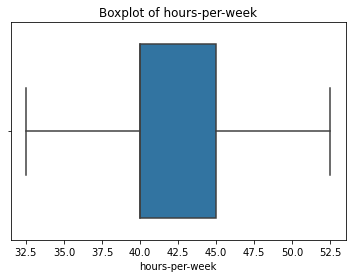

In [31]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Now the outliers are removed from these 4 features.

#### (4) Converting target to values to 1 and 0 using LabelEncoder:

In [32]:
target.value_counts()

<=50K    6987
>50K     2301
Name: Income-category, dtype: int64

In [33]:
label_encoder = LabelEncoder()
# transform method is similar to predict for 
target_encoded = pd.DataFrame(label_encoder.fit_transform(target), columns=[">50K"])
target_encoded.head()

,>50K
0,0
1,1
2,0
3,0
4,1


In [34]:
target_encoded.value_counts()

>50K
0       6987
1       2301
dtype: int64

#### (5) Converting categorical features to numerical:

In [35]:
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Local-gov,Some-college,Separated,Adm-clerical,Unmarried,White,Female,United-States
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
3,Private,11th,Never-married,Sales,Own-child,Black,Female,United-States
4,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


First dropping the "education" feature:

In [36]:
data_categorical = data_categorical.drop("education", axis=1)

In [37]:
data_categorical.head()

,workclass,marital-status,occupation,relationship,race,sex,native-country
0,Local-gov,Separated,Adm-clerical,Unmarried,White,Female,United-States
1,Private,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
3,Private,Never-married,Sales,Own-child,Black,Female,United-States
4,Private,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


Using OneHotEncoder to convert the rest of the categorical features to numerical:

In [38]:
onehot_encoder = OneHotEncoder(sparse=False)
categories_encoded = onehot_encoder.fit_transform(data_categorical[["workclass", "marital-status", "occupation", 
                                                                      "relationship", "race", "sex", "native-country"]])
categories_encoded[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.

In [39]:
print(f"The encoded dataset contains {categories_encoded.shape[1]} features")

The encoded dataset contains 81 features


In [40]:
columns_encoded = onehot_encoder.get_feature_names_out(data_categorical[["workclass", "marital-status", "occupation", 
                                                                      "relationship", "race", "sex", "native-country"]].columns)
categorical_columns = pd.DataFrame(categories_encoded, columns=columns_encoded)
categorical_columns[:5]

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
categorical_columns["workclass_Private"]

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9283    1.0
9284    0.0
9285    1.0
9286    1.0
9287    1.0
Name: workclass_Private, Length: 9288, dtype: float64

All the categorical columns are now converted using one-hot encoder. 

#### (6) Handling numerical features

In [42]:
numerical_columns = df.select_dtypes(include=['number'])
scaler = MinMaxScaler()

numerical_columns.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,29.0,180916.0,10,0,0,38.0
1,38.0,159179.0,10,0,1902,50.0
2,46.0,128460.0,6,0,0,40.0
3,17.0,222618.0,7,0,0,32.5
4,34.0,117444.0,13,0,0,52.5


In [43]:
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9288.0,38.335648,13.072585,17.0,28.0,37.0,47.00,75.500
fnlwgt,9288.0,187677.011641,96005.754798,18827.0,117776.0,179692.5,238351.75,419215.375
education-num,9288.0,10.133829,2.512993,3.0,9.0,10.0,13.00,16.000
capital-gain,9288.0,1016.166344,7097.077938,0.0,0.0,0.0,0.00,99999.000
capital-loss,9288.0,84.493109,397.393986,0.0,0.0,0.0,0.00,4356.000
hours-per-week,9288.0,41.418712,6.140127,32.5,40.0,40.0,45.00,52.500


In [44]:
numerical_normalized = scaler.fit_transform(numerical_columns)
numerical_normalized = pd.DataFrame(numerical_normalized, columns=numerical_columns.columns)
numerical_normalized

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.205128,0.404829,0.538462,0.0,0.000000,0.275
1,0.358974,0.350540,0.538462,0.0,0.436639,0.875
2,0.495726,0.273817,0.230769,0.0,0.000000,0.375
3,0.000000,0.508983,0.307692,0.0,0.000000,0.000
4,0.290598,0.246303,0.769231,0.0,0.000000,1.000
...,...,...,...,...,...,...
9283,0.000000,0.334238,0.307692,0.0,0.000000,0.000
9284,0.615385,0.530408,0.461538,0.0,0.000000,0.375
9285,0.239316,0.939945,0.615385,0.0,0.000000,0.000
9286,0.153846,0.363799,0.846154,0.0,0.433196,0.375


Concatenating all new columns together and finalizing the dataframe:

In [45]:
df = pd.concat([numerical_normalized, categorical_columns, target_encoded], axis=1)
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,>50K
0,0.205128,0.404829,0.538462,0.0,0.000000,0.275,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.358974,0.350540,0.538462,0.0,0.436639,0.875,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.495726,0.273817,0.230769,0.0,0.000000,0.375,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.000000,0.508983,0.307692,0.0,0.000000,0.000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.290598,0.246303,0.769231,0.0,0.000000,1.000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,0.000000,0.334238,0.307692,0.0,0.000000,0.000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
9284,0.615385,0.530408,0.461538,0.0,0.000000,0.375,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
9285,0.239316,0.939945,0.615385,0.0,0.000000,0.000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9286,0.153846,0.363799,0.846154,0.0,0.433196,0.375,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


Above is the new, clean dataset for machine analysis.

#### Evaluation Measure:

<AxesSubplot:>

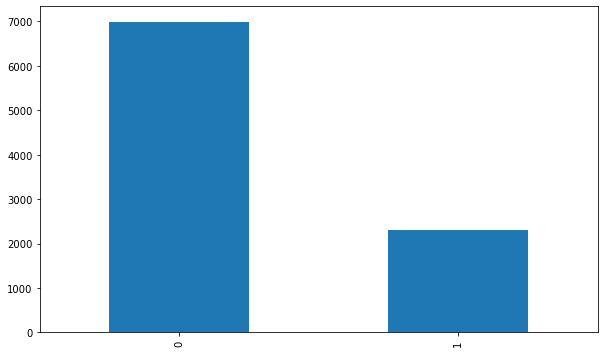

In [46]:
df[">50K"].value_counts().plot(kind="bar", figsize=(10, 6))

It can be seen above that the classes do not have equal represenation.

Accuracy therefore is not suitable for this as it needs a balanced dataset. F1-score is a good option to use when dealing with imbalanced datasets. It balances precision and recall, which can be important when you want a trade-off between false positives and false negatives.

(b) Evaluate the performance of three basic classifiers on your dataset: a decision tree 
with depth at most 3, a neural network with at most 10 hidden nodes and 1-NN.

Dataframe with just the column features:

In [47]:
df_features = pd.concat([numerical_normalized, categorical_columns], axis=1)
df_features

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.205128,0.404829,0.538462,0.0,0.000000,0.275,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.358974,0.350540,0.538462,0.0,0.436639,0.875,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.495726,0.273817,0.230769,0.0,0.000000,0.375,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.508983,0.307692,0.0,0.000000,0.000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.290598,0.246303,0.769231,0.0,0.000000,1.000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,0.000000,0.334238,0.307692,0.0,0.000000,0.000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9284,0.615385,0.530408,0.461538,0.0,0.000000,0.375,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9285,0.239316,0.939945,0.615385,0.0,0.000000,0.000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9286,0.153846,0.363799,0.846154,0.0,0.433196,0.375,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Train-test split:

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target_encoded, train_size=.75, random_state=5)

#### Decision Tree Classifier (max depth = 3):

In [49]:
dt_clf = DecisionTreeClassifier(max_depth=3) 
dt_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = dt_clf.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = dt_clf.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))

Training set F1 score = 0.6132306615330766
Test set F1 score = 0.6095238095238095


Parameters:
- criterion="entropy"

In [50]:
dt_clf = DecisionTreeClassifier(max_depth=3, criterion="entropy")
dt_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = dt_clf.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = dt_clf.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))

Training set F1 score = 0.6132306615330766
Test set F1 score = 0.6095238095238095


There is no difference adding the parameter "entropy" or "gini" to the classifier.

#### Neural network with at most 10 hidden nodes:

In [51]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [52]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=5000, random_state=5)
mlp_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = mlp_clf.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = mlp_clf.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))


Training set F1 score = 0.7124921531701193
Test set F1 score = 0.6627680311890838


1-NN:

In [53]:
knn_clf = KNeighborsClassifier(n_neighbors=1) 
knn_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = knn_clf.predict(X_train)
print("F1 score on training set prediction =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = knn_clf.predict(X_test)
print("F1 score on test set prediction =", f1_score(y_test, y_predicted))

F1 score on training set prediction = 1.0
F1 score on test set prediction = 0.5716753022452504


Out of these three classifiers it seems that MLP is the best, then Decision Tree, then 1-NN.

(c) Apply ensembles with bagging using the three classifiers from Task (b). 

For each of the classifiers I will now iterate through the ensemble sizes ("n_estimators") below and see how it effects them.

In [54]:
ensemble_sizes = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

dt_clf = DecisionTreeClassifier(max_depth=3)
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=5000, random_state=5)
knn_clf = KNeighborsClassifier(n_neighbors=1) 

folds = 5
v = 0

Decision Tree:

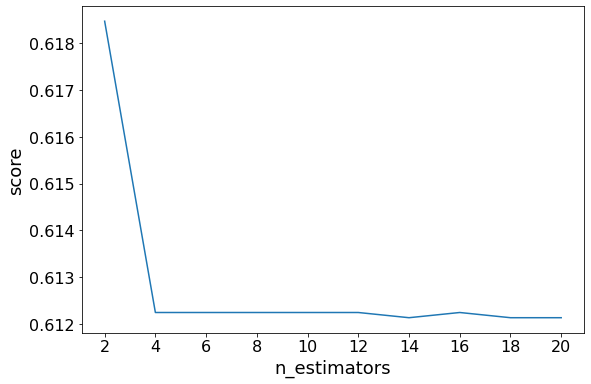

In [61]:
scores = []

for n in ensemble_sizes:
    dt_bag = BaggingClassifier(dt_clf, n_estimators = n, random_state=5)
    scores_tree_bag = cross_val_score(dt_bag, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    # print("Ensemble size {}\nMean f1 score for D_Tree_bag = {}\n".format(n, scores_tree_bag.mean()))
    scores.append(scores_tree_bag.mean())

plt.figure(figsize=(9,6))
plt.plot(ensemble_sizes, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(ensemble_sizes)

# Visualize plot
plt.show()

The best performace for Decision Tree is when the ensemble size is 2.

MLP:

In [56]:
scores = []

for n in ensemble_sizes:
    dt_bag = BaggingClassifier(dt_clf, n_estimators = n, random_state=5)
    scores_tree_bag = cross_val_score(dt_bag, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    # print("Ensemble size {}\nMean f1 score for D_Tree_bag = {}\n".format(n, scores_tree_bag.mean()))
    scores.append(scores_tree_bag.mean())

plt.figure(figsize=(9,6))
plt.plot(ensemble_sizes, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(ensemble_sizes)

# Visualize plot
plt.show()

Ensemble size 2
Mean f1 score for MLP_bag = 0.8430233724197216

Ensemble size 4
Mean f1 score for MLP_bag = 0.8484064891635699

Ensemble size 6
Mean f1 score for MLP_bag = 0.8478682180652962

Ensemble size 8
Mean f1 score for MLP_bag = 0.8489448761935898



1-NN:

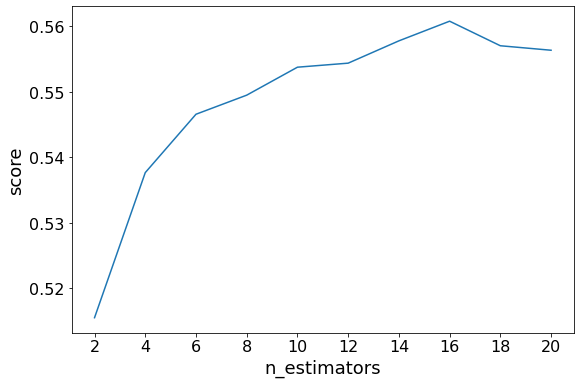

In [62]:
scores = []

for n in ensemble_sizes:
    nn_bag = BaggingClassifier(knn_clf, n_estimators = n, random_state=5)
    scores_nn_bag = cross_val_score(nn_bag, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    # print("Ensemble size {}\nMean f1 score for D_Tree_bag = {}\n".format(n, scores_tree_bag.mean()))
    scores.append(scores_nn_bag.mean())

plt.figure(figsize=(9,6))
plt.plot(ensemble_sizes, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)##
plt.xticks(ensemble_sizes)

# Visualize plot
plt.show()

The best ensemble size is 16.

Using  the  best  performing  ensemble  size, investigate how changing the number of instances in the bootstrap samples affects classification performance:

In [64]:
max_samples_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9]

Decision Tree:

For Decision Tree the best ensemble size was 2 (just over 0.618). Using that ensemble size I will now iterate through "max_samples" and see how the changing of the number of instances in the bootstrap samples affects this classifier.

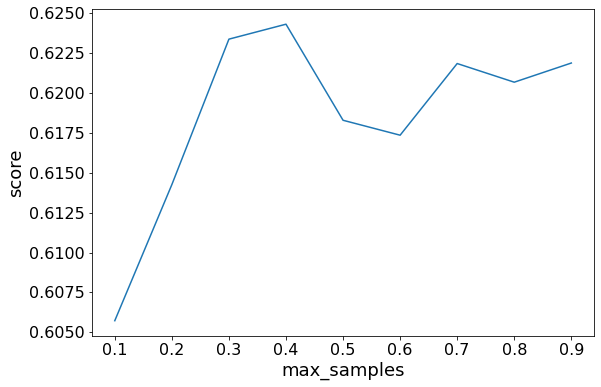

In [66]:
scores = []

for n in max_samples_sizes:
    dt_bag = BaggingClassifier(dt_clf, n_estimators = 2, max_samples=n, bootstrap=True, random_state=5)
    scores_dt_bag = cross_val_score(dt_bag, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    # print("Ensemble size {}\nMean f1 score for D_Tree_bag = {}\n".format(n, scores_tree_bag.mean()))
    scores.append(scores_dt_bag.mean())

plt.figure(figsize=(9,6))
plt.plot(max_samples_sizes, scores)

# Adjust labels and font (to make visable)
plt.xlabel("max_samples", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(max_samples_sizes)

# Visualize plot
plt.show()

You can see the best performance is when the max_samples is 0.4. Improved.

MLP:

For MLP the best ensemble size was 20. Using that ensemble size I will now iterate through "max_samples" and see how the changing of the number of instances in the bootstrap samples affects this classifier.

In [ ]:
scores = []

for n in max_samples_sizes:
    mlp_bag = BaggingClassifier(mlp_clf, n_estimators = 2, max_samples=n, bootstrap=True, random_state=5)
    scores_mlp_bag = cross_val_score(mlp_bag, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    # print("Ensemble size {}\nMean f1 score for D_Tree_bag = {}\n".format(n, scores_tree_bag.mean()))
    scores.append(scores_mlp_bag.mean())

plt.figure(figsize=(9,6))
plt.plot(max_samples_sizes, scores)

# Adjust labels and font (to make visable)
plt.xlabel("max_samples", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(max_samples_sizes)

# Visualize plot
plt.show()

You can see the best performance is when the number of instances in the bootstrap samples is 0.7. This again is only better by a very small amount than without max_samples parameter tuning.

1-NN:

For 1-NN the best ensemble size was 16. Using that ensemble size I will now iterate through "max_samples" and see how the changing of the number of instances in the bootstrap samples affects this classifier.

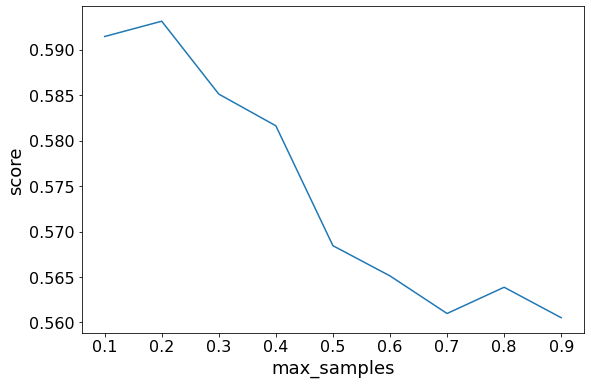

In [68]:
scores = []

for n in max_samples_sizes:
    nn_bag = BaggingClassifier(knn_clf, n_estimators = 16, max_samples=n, bootstrap=True, random_state=5)
    scores_nn_bag = cross_val_score(nn_bag, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    # print("Ensemble size {}\nMean f1 score for D_Tree_bag = {}\n".format(n, scores_tree_bag.mean()))
    scores.append(scores_nn_bag.mean())

plt.figure(figsize=(9,6))
plt.plot(max_samples_sizes, scores)

# Adjust labels and font (to make visable)
plt.xlabel("max_samples", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(max_samples_sizes)

# Visualize plot
plt.show()

You can see the best performance is when the number of instances in the bootstrap samples is 0.2.

(d) Apply ensembles with random subspacing using the three classifiers from Task (b). Investigate the performance of  each of these classifiers as the ensemble size increases.

Decision Tree:

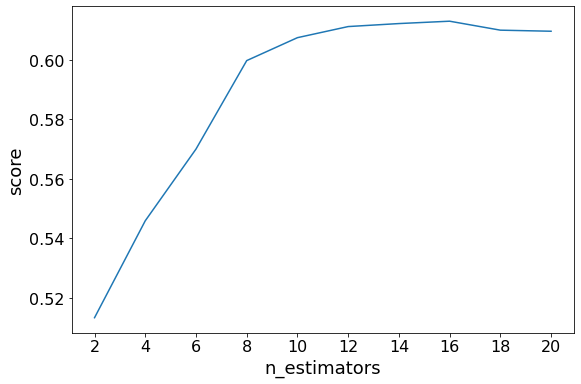

In [70]:
scores = []

for n in ensemble_sizes:
    random_SS_dt = BaggingClassifier(dt_clf, n_estimators = n, max_features=0.5, random_state=5)
    scores_SS_dt_bag = cross_val_score(random_SS_dt, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    scores.append(scores_SS_dt_bag.mean())


plt.figure(figsize=(9,6))
plt.plot(ensemble_sizes, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(ensemble_sizes)

# Visualize plot
plt.show()


The best performance above is with ensemble size 16.

MLP:

In [ ]:
scores = []

for n in ensemble_sizes:
    random_SS_mlp = BaggingClassifier(mlp_clf, n_estimators = n, max_features=0.5, random_state=5)
    scores_SS_mlp_bag = cross_val_score(random_SS_mlp, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    scores.append(scores_SS_mlp_bag.mean())


plt.figure(figsize=(9,6))
plt.plot(ensemble_sizes, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(ensemble_sizes)

# Visualize plot
plt.show()


The best performance above is with ensemble size 6.

1-NN:

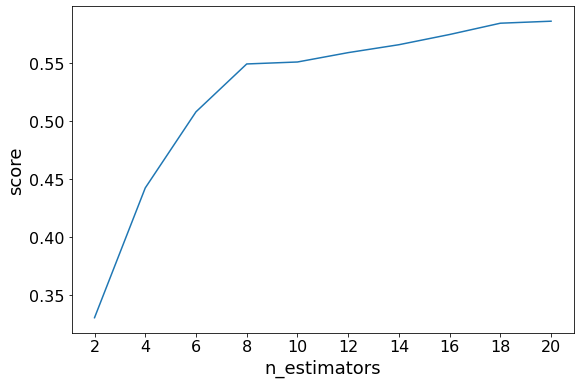

In [71]:
scores = []

for n in ensemble_sizes:
    random_SS_nn = BaggingClassifier(knn_clf, n_estimators = n, max_features=0.5, random_state=5)
    scores_SS_nn_bag = cross_val_score(random_SS_nn, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    scores.append(scores_SS_nn_bag.mean())


plt.figure(figsize=(9,6))
plt.plot(ensemble_sizes, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(ensemble_sizes)

# Visualize plot
plt.show()

Best ensemble size is 20.

Using the best performing ensemble size, investigate how changing the number of features used when applying random subspacing affects classification performance:

In [73]:
number_of_features = [.1, .2, .3, .4, .5, .6, .7, .8, .9]

Decision Tree:

For Decision Tree the best ensemble size was 16. Using that ensemble size I will now iterate through "max_features" and see how the changing of the number of features used when applying random subspacing affects this classifier.

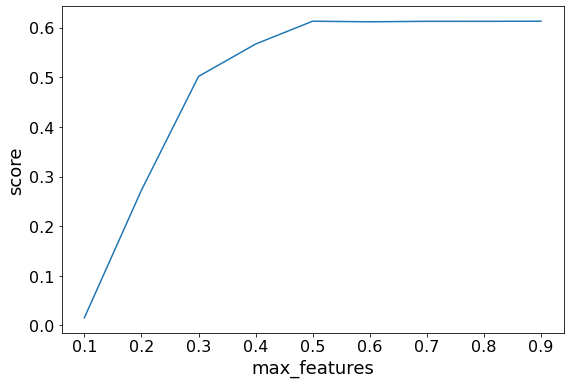

In [74]:
scores = []

for n in number_of_features:
    random_SS_dt = BaggingClassifier(dt_clf, n_estimators = 16, max_features=n, random_state=5)
    scores_SS_dt_bag = cross_val_score(random_SS_dt, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    scores.append(scores_SS_dt_bag.mean())


plt.figure(figsize=(9,6))
plt.plot(number_of_features, scores)

# Adjust labels and font (to make visable)
plt.xlabel("max_features", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(number_of_features)

# Visualize plot
plt.show()


As the feature number increases the mean f1-score increases. The highest score is at 0.9 which is 0.61 and the lowest is at 0.1 which is 0.11. 

In [ ]:
scores = []

for n in number_of_features:
    random_SS_mlp = BaggingClassifier(mlp_clf, n_estimators = 16, max_features=n, random_state=5)
    scores_SS_mlp_bag = cross_val_score(random_SS_mlp, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    scores.append(scores_SS_mlp_bag.mean())


plt.figure(figsize=(9,6))
plt.plot(number_of_features, scores)

# Adjust labels and font (to make visable)
plt.xlabel("max_features", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(number_of_features)

# Visualize plot
plt.show()


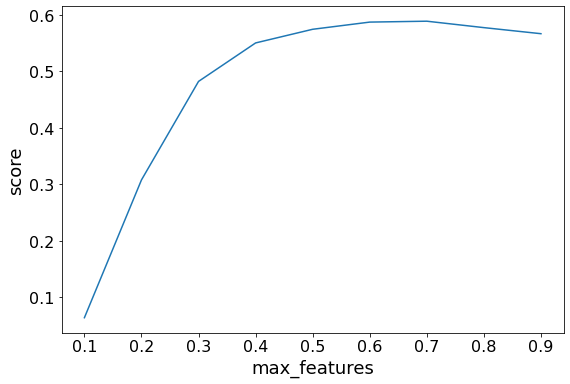

In [75]:
scores = []

for n in number_of_features:
    random_SS_nn = BaggingClassifier(knn_clf, n_estimators = 16, max_features=n, random_state=5)
    scores_SS_nn_bag = cross_val_score(random_SS_nn, df_features, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='f1')
    scores.append(scores_SS_nn_bag.mean())


plt.figure(figsize=(9,6))
plt.plot(number_of_features, scores)

# Adjust labels and font (to make visable)
plt.xlabel("max_features", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.xticks(number_of_features)

# Visualize plot
plt.show()


(e) Based on the lectures, which set of classifiers is expected to benefit more from bagging 
techniques than random subspacing and which classifiers benefit more from random 
subspacing?

- From the lectures it was shown that bagging works for Decision Tree and not k-NN. It was also conveyed that bootstrap resampling works for decision tree ensembles but not for k-NN. This is because k-NN is a stable classifier so bootstrap resampling does not produce diversity. However, random subspacing does work well k-NN and produce diversity.

For your dataset, determine the best ensemble strategy for each of these classifiers. 

- For Decision Tree, the best ensemble strategy is bagging with n_estimators = 2 and max_samples = 0.4.
- For MLP, ...
- For 1-NN, the best ensemble strategy is bagging with n_estimators = 16 and max_samples = 0.2.

Discuss if this is in line with what you expected.

Discuss if there is enough diversity in your ensemble and what else could you have done to improve the performance of your ensemble.

- Perform more extensive hyperparameter tuning. 